In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus']=False 

In [93]:
price=pd.read_csv("C:/Users/kitcoop/Desktop/product_price_20241212.csv",encoding='cp949')
shipment=pd.read_csv("C:/Users/kitcoop/Desktop/product_shipment_20241212.csv",encoding='cp949')

In [95]:
price=price[['구분', '평균','품목']]
price['품목'] = price['품목'].replace('깐마늘', '마늘')
price.head()

,구분,평균,품목
0,2014-01-02,202,감자
1,2014-01-03,208,감자
2,2014-01-04,208,감자
3,2014-01-05,208,감자
4,2014-01-06,281,감자


In [97]:
price['품목'].unique()

array(['감자', '건고추', '고구마', '마늘', '당근', '대파', '무', '배추', '시금치', '쌀', '애호박',
       '양배추', '양파', '오이', '콩나물', '새송이버섯', '팽이'], dtype=object)

In [99]:
shipment=shipment[['DATE','품목명','총반입량']]
shipment.head()

,DATE,품목명,총반입량
0,2024-11-09,감자,201
1,2024-11-08,감자,244
2,2024-11-07,감자,247
3,2024-11-06,감자,208
4,2024-11-05,감자,199


In [101]:
shipment['품목명'].unique()

array(['감자', '건고추', '고구마', '마늘', '당근', '대파', '무', '배추', '시금치', '양배추',
       '양파', '오이'], dtype=object)

In [103]:
df=pd.merge(shipment,price,how='inner',left_on=['DATE','품목명'],right_on=['구분','품목']).drop(columns=['품목','구분'])
df.head()

,DATE,품목명,총반입량,평균
0,2024-11-08,감자,244,326
1,2024-11-07,감자,247,328
2,2024-11-06,감자,208,339
3,2024-11-05,감자,199,340
4,2024-11-04,감자,193,342


In [105]:
df['DATE'] = pd.to_datetime(df['DATE']) 
df['월'] = df['DATE'].dt.month
df['평균'] = df['평균'].replace(',', '', regex=True).astype(float) 
df['총반입량'] = df['총반입량'].replace(',', '', regex=True).astype(float)

In [107]:
df

,DATE,품목명,총반입량,평균,월
0,2024-11-08,감자,244.0,326.0,11
1,2024-11-07,감자,247.0,328.0,11
2,2024-11-06,감자,208.0,339.0,11
3,2024-11-05,감자,199.0,340.0,11
4,2024-11-04,감자,193.0,342.0,11
...,...,...,...,...,...
33993,2014-01-08,오이,161.0,10610.0,1
33994,2014-01-07,오이,138.0,10610.0,1
33995,2014-01-06,오이,273.0,10610.0,1
33996,2014-01-04,오이,143.0,10551.0,1


In [109]:
lst_vegi=df['품목명'].unique()

In [111]:
lst_vegi

array(['감자', '건고추', '고구마', '마늘', '당근', '대파', '무', '배추', '시금치', '양배추',
       '양파', '오이'], dtype=object)

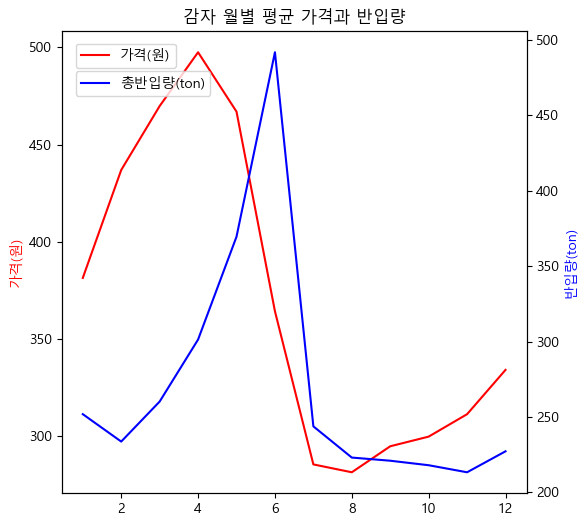

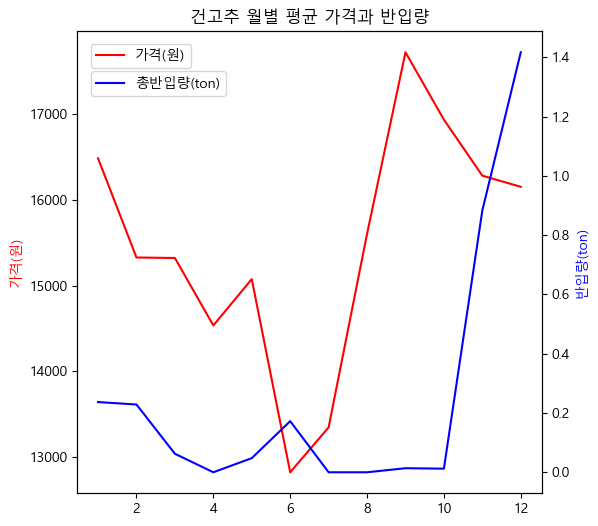

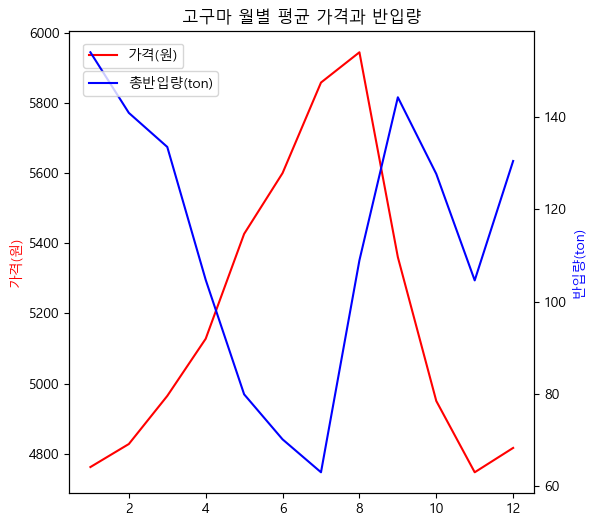

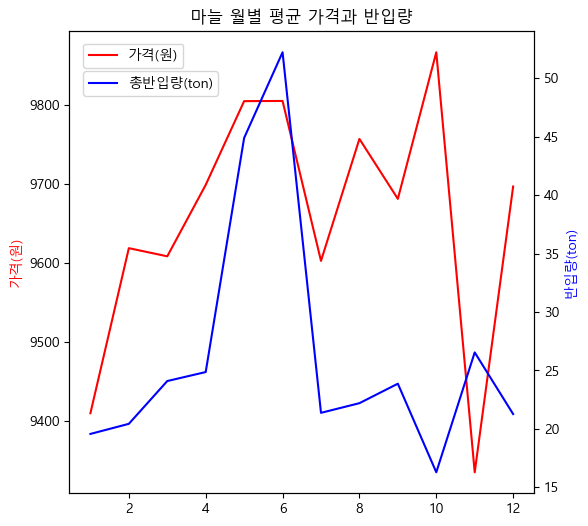

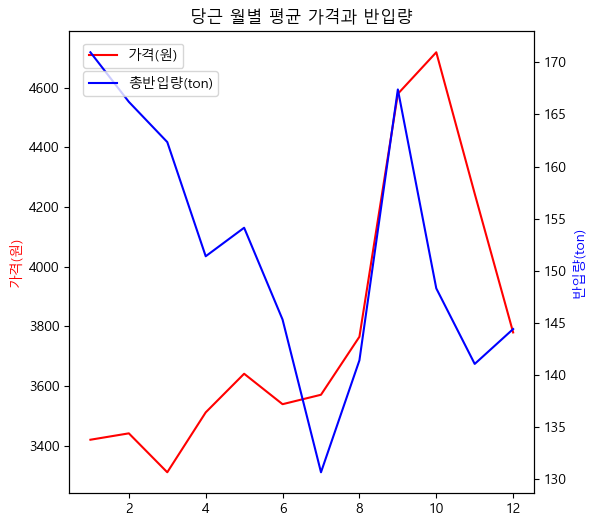

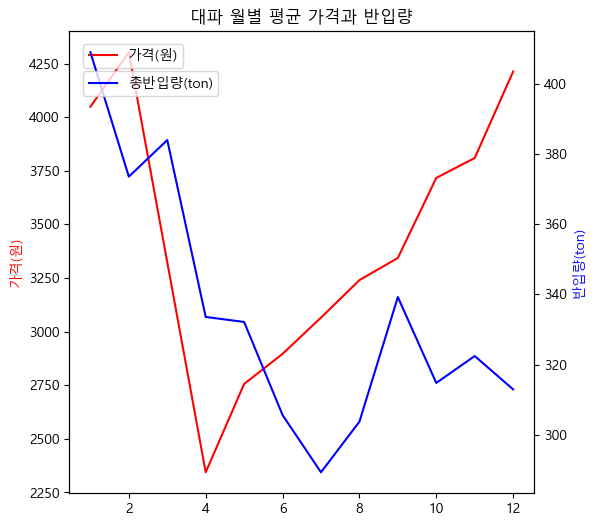

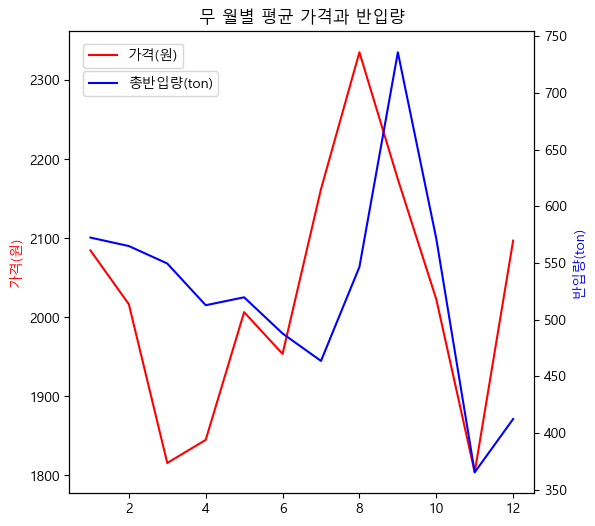

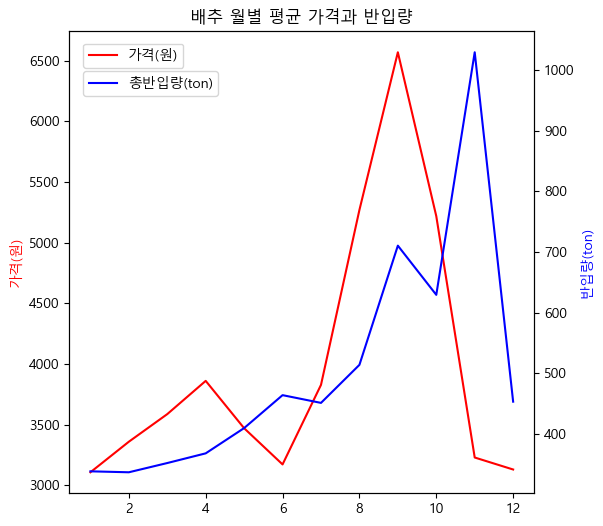

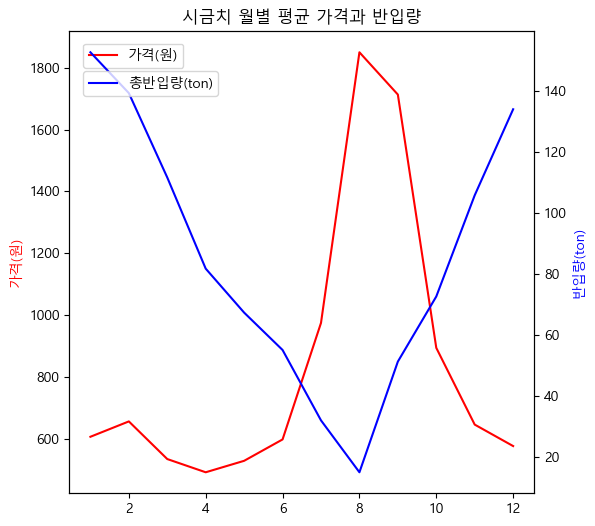

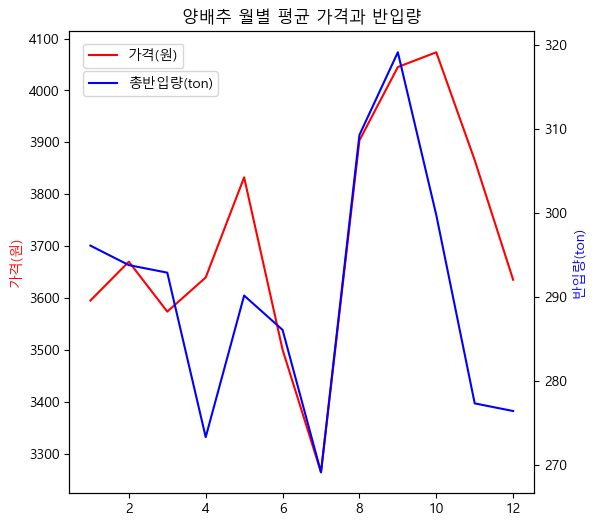

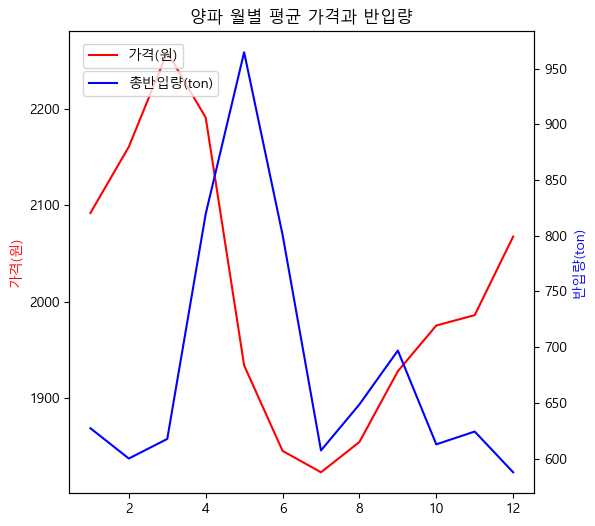

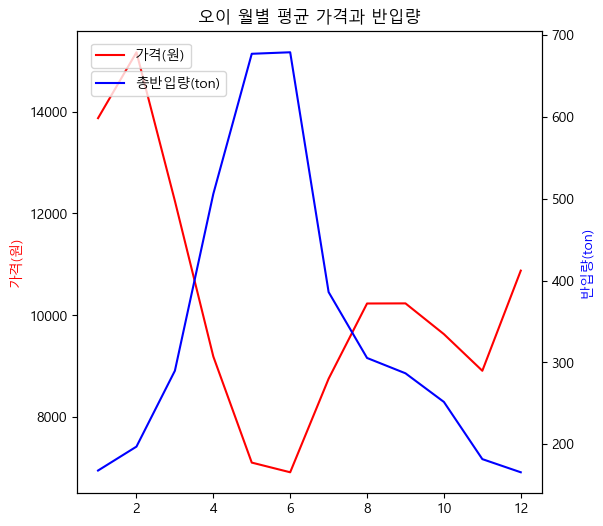

In [119]:
lst_vegi = df['품목명'].unique()

for i in lst_vegi:
    df_filtered = df[df['품목명'] == i]
    
    monthly_data = df_filtered.groupby('월').agg(
        월별_평균가격=('평균', 'mean'),
        월별_총반입량=('총반입량', 'mean')
    )
    x = monthly_data.index
    y = monthly_data['월별_평균가격']
    y2 = monthly_data['월별_총반입량']
    
    fig, ax1 = plt.subplots(figsize=(6, 6))
    ax1.plot(x, y, color='red', label='가격(원)')
    ax1.set_ylabel('가격(원)', color='red')
    
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='blue', label='총반입량(ton)')
    ax2.set_ylabel('반입량(ton)', color='blue')
    
    ax1.legend(loc=(0.03, 0.92))
    ax2.legend(loc=(0.03, 0.86))
    plt.title(f'{i} 월별 평균 가격과 반입량')
    
    plt.show()



In [ ]:
당근, 양배추, 대파